# Exploring BioPsychoSocial Assessment Data for a Behavioral Healthcare Provider

**By:** Scott Hongola

**Data:** Source data is from a client's biopsychosocial (bps) assessment data that has removed all protected patient health information using the "Safe Harbor" method - thus dates, insurance, and demographic information has been manipulated for privacy reasons.

**Keywords:**
- **Diagnosis:** There can be several diagnoses per client depending upon substances used and mental health issues
- **Diagnosis Code:** This is a diagnostic code from the Diagnosit and Statistical Manual of Mental Disorders (DSM-5)
- **Discharge Type:** This represents that type of discharge that was processed for a client
    - **Completed Treatment:** Client completed treatment
    - **Left AMA:** Client left the program against medical advice (left on their own accord prior to being deemed       ready)
    - **Referred Outside if Agency:** Client was referred to a higher level of care due to medical or mental health       complications
    - **Administrative Discharge:** Client was discharged by the program for non-compliance with program rules

#### Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [68]:
# import dataframe and make a copy to work from
df = pd.read_csv("FSR_BPS_clovis.csv")
bps = df.copy()

### Exploratory Data Analysis

In [69]:
# explore dataframe data types
bps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 20 columns):
MR_number             557 non-null object
admission_date        557 non-null object
discharge_date        537 non-null object
length_of_stay        537 non-null float64
age                   557 non-null int64
gender                557 non-null object
marital_status        497 non-null object
ethnicity             554 non-null object
height                556 non-null object
BMI                   556 non-null float64
diagnosis             556 non-null object
diagnosis_code        556 non-null object
incarceration         557 non-null object
education_level       548 non-null object
military_service      557 non-null object
sexual_orientation    557 non-null object
attempted_suicide     557 non-null object
childhood_abuse       557 non-null object
hx_of_sexual_abuse    557 non-null object
discharge_type        510 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage:

**Observations:**
 >- This dataframe has 557 Rows 
 >- Some of the categorical data has not been captured in the bps such as 'marital_status', 'education_level', 
    and 'discharge_type' appear not to have values for certain rows. Imputing values in these categories is not 
    possible and thus we will leave as null
 >- Data types of certain columns are not appropriate (for example 'admission_date', 'discharge_date')

In [70]:
# change Date-Time dataframe objects to datetime in pandas
bps['admission_date'] = pd.to_datetime(bps['admission_date']).dt.floor('d')
bps['discharge_date'] = pd.to_datetime(bps['discharge_date']).dt.floor('d')

# Add Quarter column for visualizations
bps['Quarter'] = pd.PeriodIndex(bps.admission_date, freq='Q')

In [71]:
# review data type changes and additional column
bps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 21 columns):
MR_number             557 non-null object
admission_date        557 non-null datetime64[ns]
discharge_date        537 non-null datetime64[ns]
length_of_stay        537 non-null float64
age                   557 non-null int64
gender                557 non-null object
marital_status        497 non-null object
ethnicity             554 non-null object
height                556 non-null object
BMI                   556 non-null float64
diagnosis             556 non-null object
diagnosis_code        556 non-null object
incarceration         557 non-null object
education_level       548 non-null object
military_service      557 non-null object
sexual_orientation    557 non-null object
attempted_suicide     557 non-null object
childhood_abuse       557 non-null object
hx_of_sexual_abuse    557 non-null object
discharge_type        510 non-null object
Quarter               557 non-null per

In [72]:
# Explore dataset columns
bps.head()

,MR_number,admission_date,discharge_date,length_of_stay,age,gender,marital_status,ethnicity,height,BMI,...,diagnosis_code,incarceration,education_level,military_service,sexual_orientation,attempted_suicide,childhood_abuse,hx_of_sexual_abuse,discharge_type,Quarter
0,016-065,2016-10-13,2016-10-23,11.0,23,male,NaN,White/Caucasian,0,0.0,...,"F33.1, F41.1, F11.20, F14.20, F13.20",Yes,12,No,Heterosexual,No,No,No,NaN,2016Q4
1,016-066,2016-10-15,2016-10-30,16.0,46,female,Married,White/Caucasian,0,0.0,...,0,Yes,10,No,Heterosexual,No,No,No,NaN,2016Q4
2,016-067,2016-10-15,2016-11-11,28.0,24,male,NaN,White/Caucasian,0,0.0,...,"F11.20, F32.1",No,11,No,Heterosexual,No,No,No,NaN,2016Q4
3,016-068,2016-10-26,2017-08-08,287.0,51,female,Married,White/Caucasian,0,0.0,...,"F11.22, F11.20, F33.1, F43.1",No,some college,No,Heterosexual,Yes,Yes,No,Completed treatment,2016Q4
4,016-069,2016-10-29,2017-04-26,180.0,23,male,NaN,White/Caucasian,0,0.0,...,"F11.20, F12.20, F41.1",No,Associates Degree,No,Heterosexual,No,Yes,No,NaN,2016Q4


In [73]:
# expand diagnosis code column into multiple diagnoses
#bps = bps['diagnosis_code'].str.split(',', expand=True)

# expand diagnosis code column into multiple diagnoses
#bps_dx = bps['diagnosis_code'].str.split(',', expand=True)

# expand diagnosis code column into multiple diagnoses and rename columns
bps[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8']] = bps.diagnosis_code.str.split(',', expand=True)

In [74]:
bps.head()

,MR_number,admission_date,discharge_date,length_of_stay,age,gender,marital_status,ethnicity,height,BMI,...,discharge_type,Quarter,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8
0,016-065,2016-10-13,2016-10-23,11.0,23,male,NaN,White/Caucasian,0,0.0,...,NaN,2016Q4,F33.1,F41.1,F11.20,F14.20,F13.20,None,None,None
1,016-066,2016-10-15,2016-10-30,16.0,46,female,Married,White/Caucasian,0,0.0,...,NaN,2016Q4,0,None,None,None,None,None,None,None
2,016-067,2016-10-15,2016-11-11,28.0,24,male,NaN,White/Caucasian,0,0.0,...,NaN,2016Q4,F11.20,F32.1,None,None,None,None,None,None
3,016-068,2016-10-26,2017-08-08,287.0,51,female,Married,White/Caucasian,0,0.0,...,Completed treatment,2016Q4,F11.22,F11.20,F33.1,F43.1,None,None,None,None
4,016-069,2016-10-29,2017-04-26,180.0,23,male,NaN,White/Caucasian,0,0.0,...,NaN,2016Q4,F11.20,F12.20,F41.1,None,None,None,None,None


In [75]:
# get basic statistical data 
bps.describe()

,length_of_stay,age,BMI
count,537.000000,557.000000,556.000000
mean,50.560521,40.238779,23.266223
std,49.202602,13.886050,10.765018
min,3.000000,18.000000,0.000000
25%,18.000000,28.000000,20.947500
50%,32.000000,39.000000,24.800000
75%,67.000000,52.000000,29.560000
max,327.000000,75.000000,66.760000


### Explore Diagnosis features in population

In [76]:
# clean data for exploratory analysis

bps['dx1'] = bps['dx1'].str.strip()
bps['dx2'] = bps['dx2'].str.strip()
bps['dx3'] = bps['dx3'].str.strip()
bps['dx4'] = bps['dx4'].str.strip()
bps['dx5'] = bps['dx5'].str.strip()
bps['dx6'] = bps['dx6'].str.strip()
bps['dx7'] = bps['dx7'].str.strip()
bps['dx8'] = bps['dx8'].str.strip()
bps['gender'] = bps['gender'].str.strip()
bps['marital_status'] = bps['marital_status'].str.strip()
bps['ethnicity'] = bps['ethnicity'].str.strip()
bps['incarceration'] = bps['incarceration'].str.strip()
bps['military_service'] = bps['military_service'].str.strip()
bps['attempted_suicide'] = bps['attempted_suicide'].str.strip()
bps['childhood_abuse'] = bps['childhood_abuse'].str.strip()
bps['hx_of_sexual_abuse'] = bps['hx_of_sexual_abuse'].str.strip()
bps['gender'] = bps['gender'].str.lower()
bps['marital_status'] = bps['marital_status'].str.lower()
bps['ethnicity'] = bps['ethnicity'].str.lower()
bps['incarceration'] = bps['incarceration'].str.lower()
bps['military_service'] = bps['military_service'].str.lower()
bps['attempted_suicide'] = bps['attempted_suicide'].str.lower()
bps['childhood_abuse'] = bps['childhood_abuse'].str.lower()
bps['hx_of_sexual_abuse'] = bps['hx_of_sexual_abuse'].str.lower()

In [77]:
# clean diagnoses columns from input errors
cols = ['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8']
bps[cols] = bps[cols].replace({'F10.2':'F10.20', 'F11.220':'F11.22', 'F10.230':'F10.23', 'F11.2':'F11.20',
                              'F12.2':'F12.20', 'F13.1':'F13.10', 'F13.2':'F13.20', 'F13.220':'F13.20', 
                              'F13.120':'F13.12', 'F14.1':'F14.10', 'F13.2':'F13.20', 'F14.220':'F14.20',
                              'F15.150':'F15.15', 'F15.2':'F15.20', 'F15.220':'F15.20', 'F15.222':'F15.20', 
                              'F15.280':'F15.28', 'F31.0':'F31', 'F33.0':'F33', 'F43.1':'F43.10', 
                              'F90.0':'F90', 'F11.21':'F11.20', 'F11.23':'F11.20', 'F10.220':'F10.20',
                              'F10.23':'F10.20', 'F11.22':'F11.20', 'F14.21':'F14.20', 'F10.21':'F10.20', 
                              'F15.21':'F15.20', 'F11.11':'F11.10', 'F15.28':'F15.20', 'F10.22':'F10.20',
                              'F11.90':'F11.10', 'F12.11':'F12.10', 'F13.11':'F13.10', 'F13.21':'F13.20', 
                              'F15.15':'F15.10', 'F15.23':'F15.20', 'F15.29':'F15.20', 'F11.23':'F11.20',
                              'F11.21':'F11.20', 'F10.220':'F10.20', 'F10.23':'F10.20', 'F11.23':'F11.20',
                              'F10.9':'F10.10', 'F10.24':'F10.20', '15.2':'F15.20', '0':'F10.10',
                              'F10.92':'F10.10', 'F12.21':'F12.20', 'F13.12':'F13.10', 'F13.90':'F13.10',
                              'F15.11':'F15.10', 'F15.12':'F15.10', 'F15.15':'F15.10', 'F13.12':'F13.10',
                              'F15.15':'F15.10', 'F15.18':'F15.10', 'F15.28':'F15.20', 'F16.21':'F16.10',
                              'F10.23':'F10.10', 'F11.22':'F11.20', 'F13.12':'F13.10', 'F16.21':'F16.10', 
                              'F32.9':'F33.1', 'F32.1':'F33.1', 'F33.2':'F33.1', 'F41.9':'F41.1'})

# collapse multi-level diagnoses to root level
bps[cols] = bps[cols].replace({'F10.20':'F10.10', 'F16.20':'F16.10', 'F18.20':'F18.10', 'F15.20':'F15.10',
                              'F14.20':'F14.10', 'F12.20':'F12.10', 'F11.20':'F11.10', 'F13.20':'F13.10', 
                              'F17.20':'F17.10'})
# drop previous diagnosis code column
bps = bps.drop('diagnosis_code', 1)

# clean data set by setting lower case on object data types since this data is manually typed in and case will vary
bps.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

,MR_number,admission_date,discharge_date,length_of_stay,age,gender,marital_status,ethnicity,height,BMI,...,discharge_type,Quarter,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8
0,016-065,2016-10-13,2016-10-23,11.0,23,male,NaN,white/caucasian,0,0.00,...,NaN,2016Q4,f33.1,f41.1,f11.10,f14.10,f13.10,None,None,None
1,016-066,2016-10-15,2016-10-30,16.0,46,female,married,white/caucasian,0,0.00,...,NaN,2016Q4,f10.10,None,None,None,None,None,None,None
2,016-067,2016-10-15,2016-11-11,28.0,24,male,NaN,white/caucasian,0,0.00,...,NaN,2016Q4,f11.10,f33.1,None,None,None,None,None,None
3,016-068,2016-10-26,2017-08-08,287.0,51,female,married,white/caucasian,0,0.00,...,completed treatment,2016Q4,f11.10,f11.10,f33.1,f43.10,None,None,None,None
4,016-069,2016-10-29,2017-04-26,180.0,23,male,NaN,white/caucasian,0,0.00,...,NaN,2016Q4,f11.10,f12.10,f41.1,None,None,None,None,None
5,016-070,2016-11-08,2017-08-03,269.0,27,female,NaN,white/caucasian,0,0.00,...,completed treatment,2016Q4,f11.10,f15.10,f21,None,None,None,None,None
6,016-071,2016-11-08,2017-01-06,60.0,35,female,NaN,white/caucasian,0,0.00,...,NaN,2016Q4,f31.62,f90.2,f41.1,f14.10,f11.10,None,None,None
7,016-072,2016-11-09,2017-01-26,79.0,65,male,divorced,white/caucasian,0,0.00,...,NaN,2016Q4,f31.32,f15.10,f11.10,None,None,None,None,None
8,016-073,2016-11-10,2016-12-31,52.0,30,male,single,asian,0,0.00,...,NaN,2016Q4,f15.10,None,None,None,None,None,None,None
9,016-076,2016-11-17,2017-09-27,315.0,61,female,NaN,hispanic/latino,0,0.00,...,completed treatment,2016Q4,f15.10,f33.1,None,None,None,None,None,None


In [78]:
# use melt pandas function to unpivot diagnoses and group by diagnosis code to understand frequency of diagnoses
df_melt = bps.loc[:, ['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8']].melt()
group_dx = df_melt.groupby('value').size().reset_index()

In [79]:
# arrange diagnosis dataframe by counting 10 largest diagnosis
arr = np.array(group_dx)
diagnosis = pd.DataFrame(data=arr)
diagnosis.columns = ['diagnosis', 'frequency']
diagnosis = diagnosis.astype({'frequency': int})
freq_dx = diagnosis.nlargest(10, ['frequency'])

# convert diagnosis code to understandable substance or mental health diagnosis
freq_dx['diagnosis'] = freq_dx['diagnosis'].replace({'F10.10':'Alcohol Abuse', 'F11.10':'Opioid Abuse',
                              'F15.10':'Stimulant Abuse', 'F12.10':'Cannabis Abuse', 'F13.10':'Sedative, Anxiolytic Abuse', 
                              'F14.10':'Cocaine Abuse', 'F41.1': 'Generalized Anxiety', 'F33.1':'Major Depressive Disorder',
                              'F43.10': 'PTSD', 'F31.9': 'Bipolar Disorder'})

# create % of population column to normalize frequency due to possibility of multiple diagnoses
freq_dx['pct_population'] = freq_dx['frequency'] / bps['MR_number'].nunique()
freq_dx

,diagnosis,frequency,pct_population
1,Alcohol Abuse,405,0.728417
3,Opioid Abuse,190,0.341727
9,Stimulant Abuse,149,0.267986
5,Cannabis Abuse,143,0.257194
35,Major Depressive Disorder,124,0.223022
42,Generalized Anxiety,97,0.174460
6,"Sedative, Anxiolytic Abuse",85,0.152878
8,Cocaine Abuse,84,0.151079
46,PTSD,38,0.068345
29,Bipolar Disorder,12,0.021583


**Observations:**
 >- Alcohol abuse is a significant diagnosis with more than 72% of the client population being diagnosed
 >- Depression is the primary mental health issue being diagnosed with anxiety being close behind

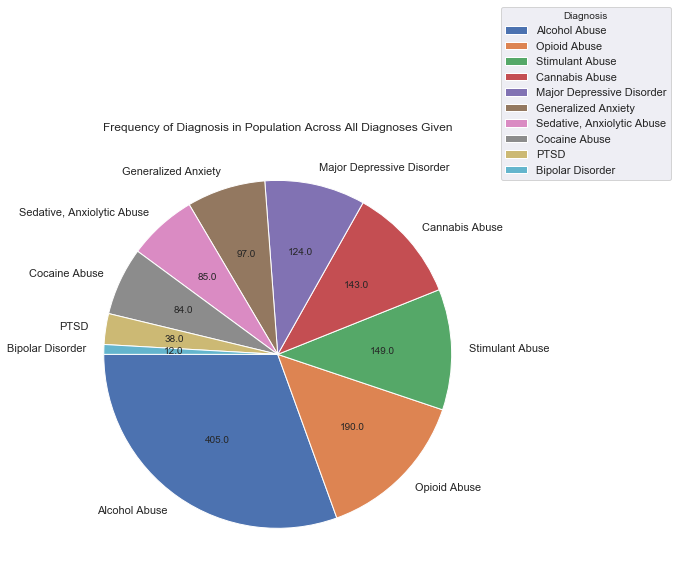

In [80]:
# visualize frequency of diagnoses
labels = freq_dx['diagnosis']
sizes = freq_dx['frequency']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.figure(figsize=(12,8))
plt.pie(sizes, labels=labels, autopct=absolute_value, shadow=False, startangle=180)
plt.legend(labels, title="Diagnosis", loc="center left", bbox_to_anchor=(1, 0.6, 1, 1))
plt.title("Frequency of Diagnosis in Population Across All Diagnoses Given")
plt.show()

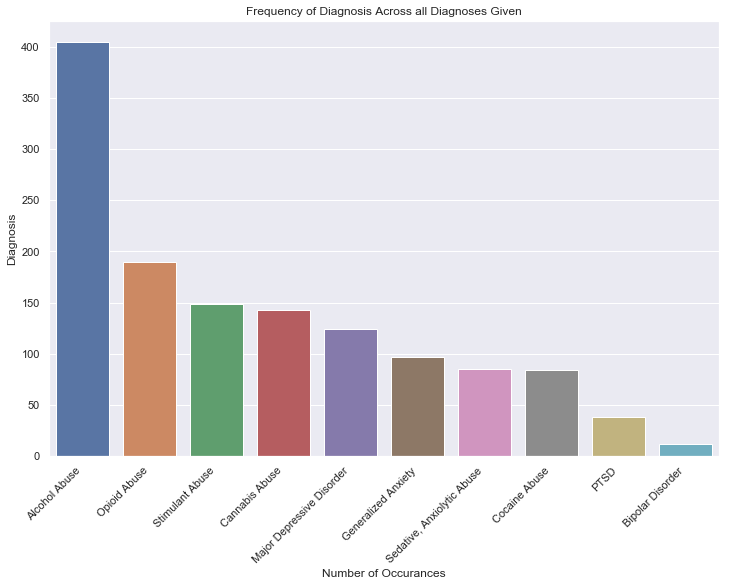

In [81]:
# Plot frequency of diagnoses given for entire population
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
freq_chart = sns.barplot(freq_dx.diagnosis, freq_dx.frequency)
freq_chart.set_xticklabels(freq_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Frequency of Diagnosis Across all Diagnoses Given')
plt.xlabel('Number of Occurances')
plt.ylabel('Diagnosis')
plt.show()

In [82]:
# create dataframe of only primary diagnosis on dx1 (axis 1 diagnosis on biopsychosocial which is primary diagnosis)
primary = bps.dx1.value_counts().reset_index()
primary

,index,dx1
0,F10.10,333
1,F11.10,114
2,F15.10,58
3,F13.10,12
4,F12.10,11
5,F14.10,11
6,F33.1,5
7,F11.22,4
8,F10.23,2
9,F31.9,1


In [83]:
# arrange diagnosis dataframe by counting 10 largest diagnosis on primary diagnosis axis 1
arr_2 = np.array(primary)
primary_dx = pd.DataFrame(data=arr_2)
primary_dx.columns = ['diagnosis', 'frequency']
primary_dx = primary_dx.astype({'frequency': int})
primary_dx = primary_dx.nlargest(7, ['frequency'])

# convert diagnosis code to understandable substance or mental health diagnosis
primary_dx['diagnosis'] = primary_dx['diagnosis'].replace({'F10.10':'Alcohol Abuse', 'F11.10':'Opioid Abuse',
                              'F15.10':'Stimulant Abuse', 'F12.10':'Cannabis Abuse', 'F13.10':'Sedative, Anxiolytic Abuse', 
                              'F14.10':'Cocaine Abuse', 'F41.1': 'Generalized Anxiety', 'F33.1':'Major Depressive Disorder',
                              'F43.10': 'PTSD', 'F31.9': 'Bipolar Disorder'})

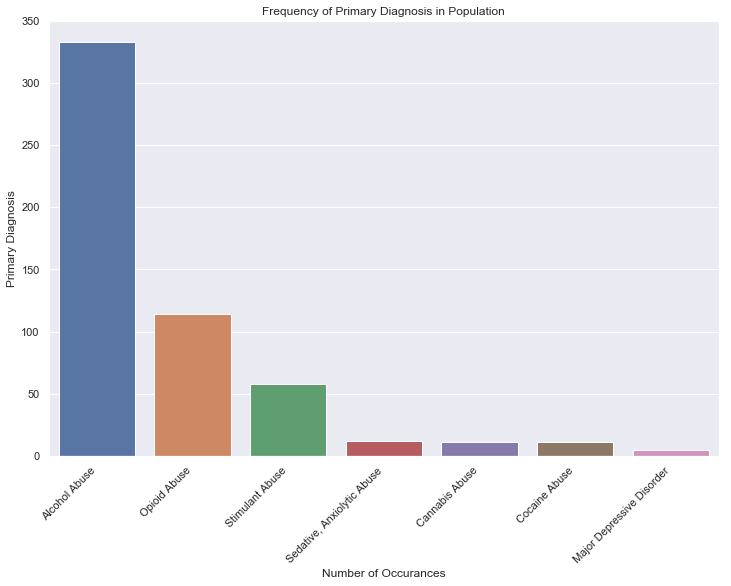

In [84]:
# plot frequency of diagnosis given for primary diagnosis
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
primary_chart = sns.barplot(primary_dx.diagnosis, primary_dx.frequency)
primary_chart.set_xticklabels(primary_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Frequency of Primary Diagnosis in Population')
plt.xlabel('Number of Occurances')
plt.ylabel('Primary Diagnosis')
plt.show()

**Observations:**
 >- As observed previously Alcohol Abuse is a frequent diagnosis given at 3 times the next closest primary diagnosis
 >- In comparison to the previous chart it appears that Cannabis, while frequently diagnosed is rarely the primary diagnosis given. 
 >- Additionaly, we see that mental health disorders such as depression and anxiety are typically not the primary diagnosis given, which is expected since this is a substance abuse facility, not a mental health facility

### Explore Discharge Type by Dataframe Features

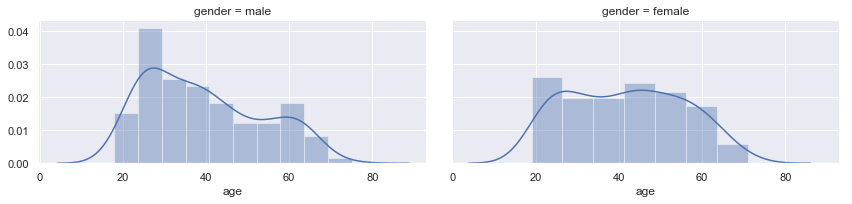

In [85]:
# understand baseline for distribution of gender and age
age_dist = sns.FacetGrid(bps, col="gender", height=3, aspect=2) 
age_dist.map(sns.distplot, "age")
plt.show()

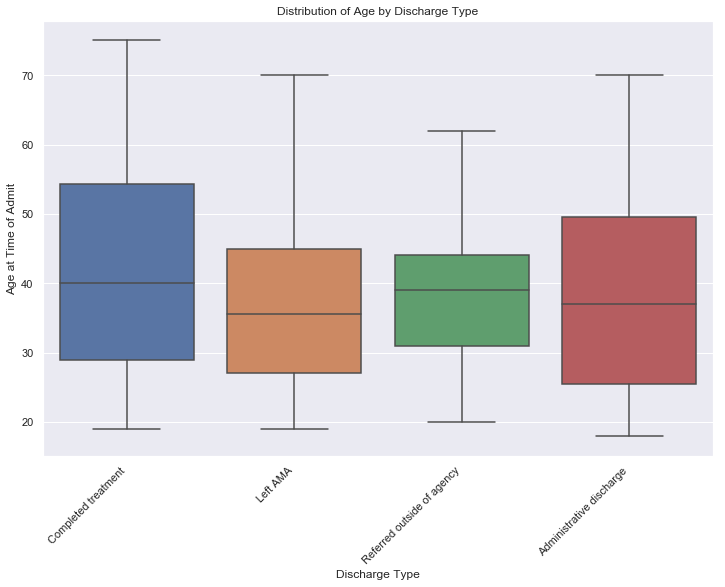

In [86]:
# Plot age at time of admit distribution by discharge type
plt.figure(figsize=(12,8))
age_discharge = sns.boxplot(x='discharge_type', y='age', data=bps)
age_discharge.set_xticklabels(age_discharge.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of Age by Discharge Type')
plt.xlabel('Discharge Type')
plt.ylabel('Age at Time of Admit')
plt.show()

**Observations:**
 >- Those that left the program against medical advice or were administratively discharged are younger than those that complete the program or are referred to a higher level of care

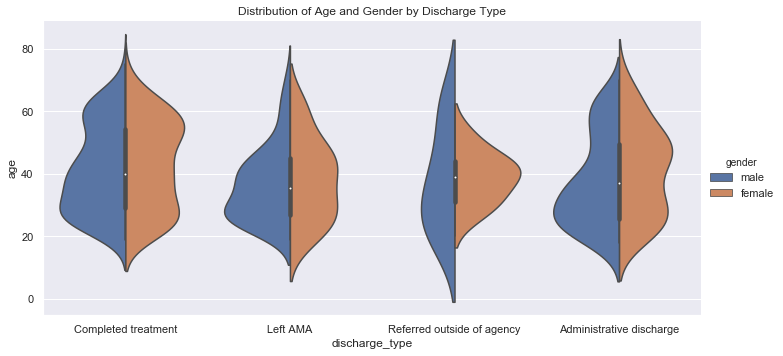

In [87]:
# plot distribution of discharge type by gender and age
sns.catplot(x="discharge_type", y="age", hue = "gender", kind = "violin", split=True, data=bps, height=5, aspect=2)
plt.title('Distribution of Age and Gender by Discharge Type')
plt.show()

### Explore Discharge Type by Dataframe Features

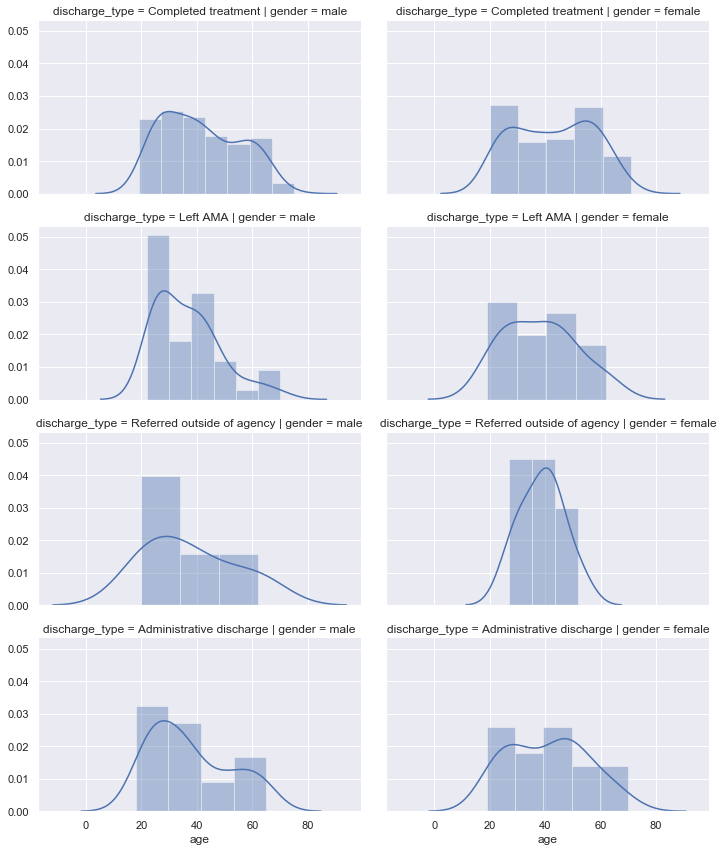

In [88]:
#plot distribution of discharge type by gender
dc_gender = sns.FacetGrid(bps, col='gender',  row='discharge_type', height=3, aspect=1.7, sharex=True)
dc_gender = dc_gender.map(sns.distplot, 'age')

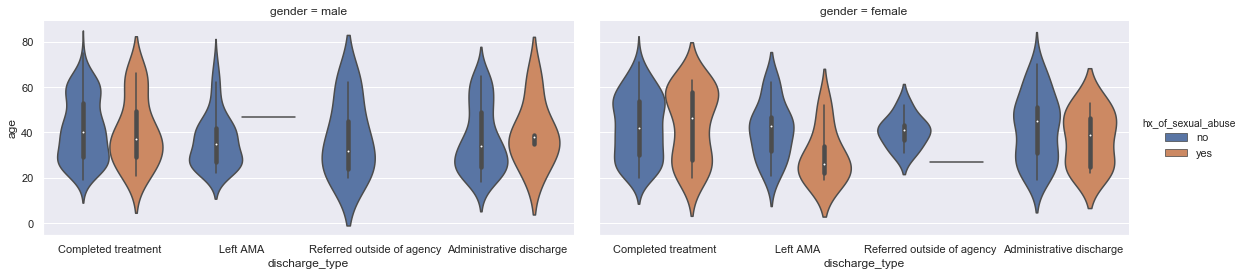

<Figure size 864x576 with 0 Axes>

In [89]:
# plot discharge type and history of sexual abuse by gender
dc_sex_abuse = sns.catplot(x = "discharge_type", y ="age", hue = "hx_of_sexual_abuse", col='gender', kind = 'violin', height=4, aspect=2, data = bps)
plt.figure(figsize=(12,8))
plt.show()

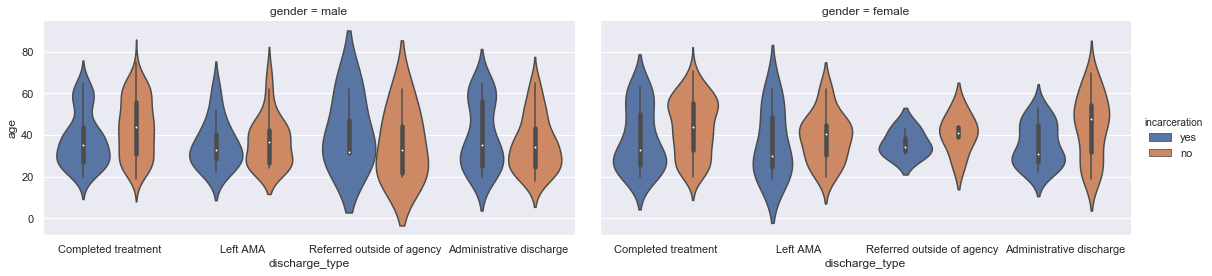

<Figure size 864x576 with 0 Axes>

In [90]:
# plot discharge type and incarceration by gender
dc_incarceration = sns.catplot(x = "discharge_type", y = "age", hue = "incarceration", col='gender', kind = 'violin', height=4, aspect=2, data = bps);
plt.figure(figsize=(12,8))
plt.show()

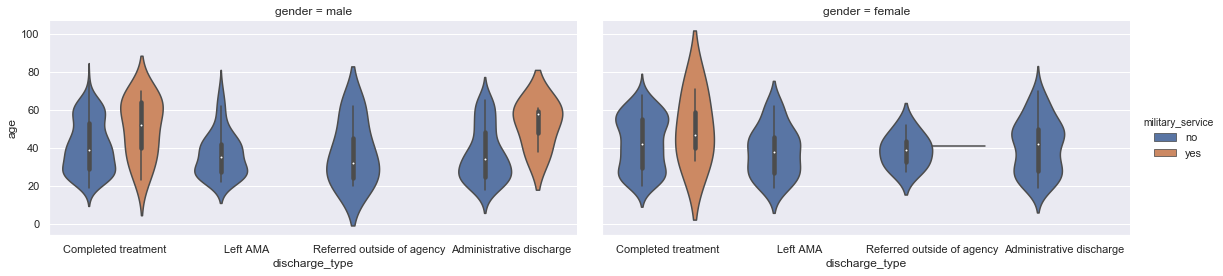

<Figure size 864x576 with 0 Axes>

In [91]:
# plot discharge type and military service by gender
dc_military = sns.catplot(x = "discharge_type", y = "age", hue = "military_service", col='gender', kind = 'violin', height=4, aspect=2, data = bps);
plt.figure(figsize=(12,8))
plt.show()

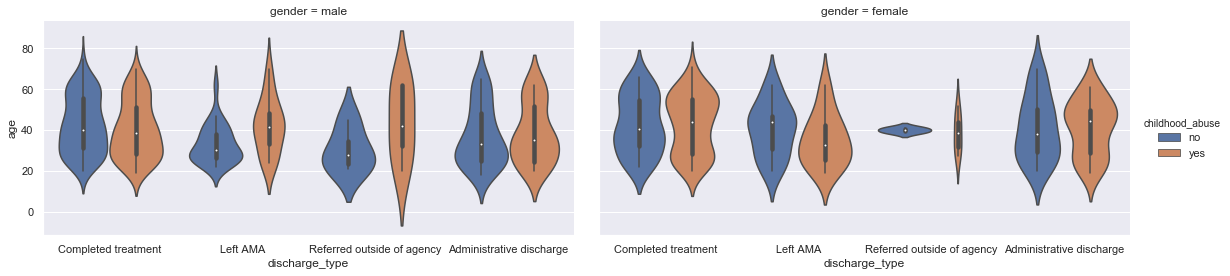

<Figure size 864x576 with 0 Axes>

In [92]:
# plot discharge type and history of child abuse by gender
dc_child_abuse = sns.catplot(x = "discharge_type", y = "age", hue = "childhood_abuse", col='gender', kind = 'violin', height=4, aspect=2, data = bps);
plt.figure(figsize=(12,8))
plt.show()

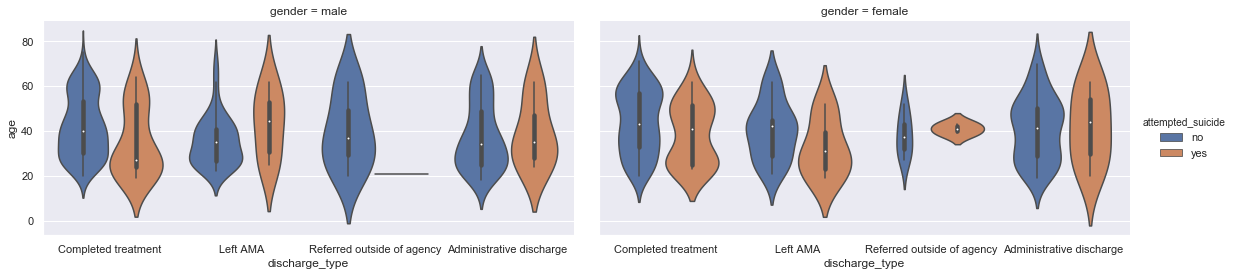

<Figure size 864x576 with 0 Axes>

In [93]:
# plot discharge type and history of attempted suicide by gender
dc_attempted_suicide = sns.catplot(x = "discharge_type", y = "age", hue = "attempted_suicide", col='gender', kind = 'violin', height=4, aspect=2, data = bps);
plt.figure(figsize=(12,8))
plt.show()

#### Explore Length of Stay and statistical data on categorical features of Data Frame

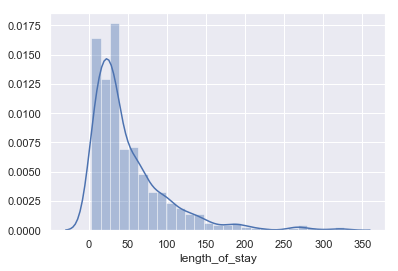

In [94]:
# filter dataframe to exclude clients who have not discharged yet
discharged = bps['length_of_stay'] >= 0
client_dc = bps[discharged]

# plot distribution of length of stay
sns.distplot(client_dc['length_of_stay'])
plt.show()

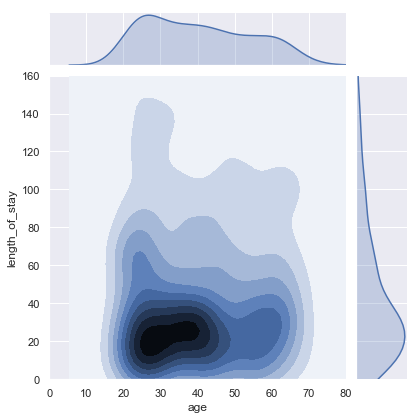

In [95]:
# plot length of stay and age with secondary charts of distribution
sns.jointplot(x=client_dc.age, y=client_dc.length_of_stay, kind="kde", data = client_dc, ylim=(0, 160), xlim=(0, 80))
plt.show()

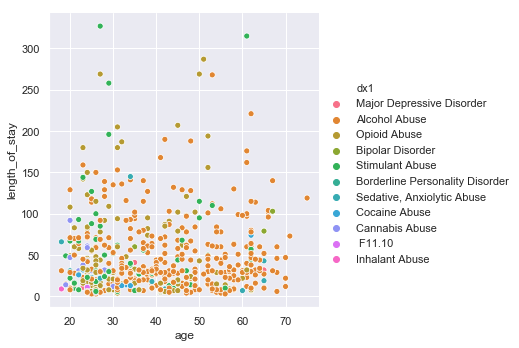

In [96]:
# plot primary diagnosis by length of stay and gender
client_dc['dx1'] = client_dc['dx1'].replace({'F31.62':'F31.9', 'F31.32':'F31.9', 'F15.15':'F15.10', 'F10.23':'F10.10',
                              'F11.20':' F11.10', 'F11.22':' F11.10'})
client_dc['dx1'] = client_dc['dx1'].replace({'F10.10':'Alcohol Abuse', 'F11.10':'Opioid Abuse','F60.3':'Borderline Personality Disorder',
                              'F15.10':'Stimulant Abuse', 'F12.10':'Cannabis Abuse', 'F13.10':'Sedative, Anxiolytic Abuse', 
                              'F14.10':'Cocaine Abuse', 'F41.1': 'Generalized Anxiety', 'F33.1':'Major Depressive Disorder',
                              'F43.10': 'PTSD', 'F31.9': 'Bipolar Disorder', 'F18.10':'Inhalant Abuse'})
sns.relplot(x="age", y="length_of_stay", hue = "dx1", data = client_dc)

In [97]:
discharge_sum = pd.pivot_table(bps, index=['discharge_type'], aggfunc='mean').reset_index()
discharge_sum.head(20)

,discharge_type,BMI,age,length_of_stay
0,Administrative discharge,20.371478,39.008696,50.321739
1,Completed treatment,24.279805,41.925325,59.253247
2,Left AMA,26.818429,37.200000,24.285714
3,Referred outside of agency,22.608824,38.235294,19.941176


In [98]:
# convert categorical data to binary values to get mean statistics on relevant categorical data
my_dict = {'yes': 1, 'no': 0, 'Yes': 1, 'No': 0}
bps.incarceration = [my_dict[item] for item in bps.incarceration]
bps.military_service = [my_dict[item] for item in bps.military_service]
bps.attempted_suicide = [my_dict[item] for item in bps.attempted_suicide]
bps.childhood_abuse = [my_dict[item] for item in bps.childhood_abuse]
bps.hx_of_sexual_abuse = [my_dict[item] for item in bps.hx_of_sexual_abuse]

In [99]:
bps.describe()

,length_of_stay,age,BMI,incarceration,military_service,attempted_suicide,childhood_abuse,hx_of_sexual_abuse
count,537.000000,557.000000,556.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,50.560521,40.238779,23.266223,0.339318,0.037702,0.138241,0.479354,0.127469
std,49.202602,13.886050,10.765018,0.473903,0.190646,0.345463,0.500023,0.333797
min,3.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,28.000000,20.947500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,39.000000,24.800000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,52.000000,29.560000,1.000000,0.000000,0.000000,1.000000,0.000000
max,327.000000,75.000000,66.760000,1.000000,1.000000,1.000000,1.000000,1.000000


## Research Proposal

**The Problem**
- While we have a small dataset on patient population that demonstrates several factors that can contribute to an individuals completion of the program, the true metric of evaluating a programs success will come from the relapse rate of those individuals that sucessfully complete the program.

- It is estimated that inpatient residential abstinance based programs have a success rate of 25% at clients maintaining sobriety past 1 year post discharge.

- Based upon the data exploration above there are several factors that could impact a clients successful completion of the program, however one data point that has not been collected in the biopsychosocial is the clients support system on the familial level for recovery.

**Hypothesis**
- Those clients that involve their family in their treatment process either through in person counseling sessions or video conferencing counseling sessions will have a higher treatment success rate (no relapses) at the 1 year mark post discharge than those clients who do not have familial support while in treatment.

**Experiment**
- Since alcohol abuse is the most common primary diagnosis regardless of demographic data, the patient population that has a primary diagnosis of alcohol abuse will be selected as the test group for this experiment. Upon intake clients will respond to a "Family Support" questionaire that details their willingness to allow family support in their treatment process. For clients that are willing to engage their family in counseling sessions while in treatment there will be a minimum of 2 family sessions completed while in inpatient care. An outcome survey will be conducted for all patients to follow-up at 30/90/120/annual (post discharge) intervals that records reponses to sobriety, relapses, family support, community support, etc. After 2 years of data collection those results will be compared for clients who has family involvement in their treatment process and those that do not to determine if family involvment is a statistically significant factor at an individuals ability to maintain sobriety.